In [ ]:
#Name :- Raushan Raj
#Roll No :- IIT2018031
#Data Mining Lab Assignment 8

In [ ]:
#connnecting drive with google colab
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


cluster  1
[-0.7319893664465486, -0.24943448080104266, -0.424899735240609, -0.3569340222066546, -0.34907881901383864, -0.4667855542850508, -0.8064903456392755, -0.6786608078479125, -0.7073131650492337, -0.675348857882429, -0.47606981743568183, -0.511333250061439, -0.960379687461313, -0.5289787906610073, -0.3054815690999474, -0.5255509710834134, 0.36067954425377496]
[0.7869608532656136, 0.1343246710512249, -0.4695518820955651, -0.3569340222066546, -0.4545762302747729, 2.605604508320453, -1.2217580572960502, -0.6786608078479125, -0.9169951914991048, 0.573962722280416, 0.11007385158785597, -0.5917958767710622, 0.6886005615351706, 0.8186421271164629, 0.0877346297784581, 0.23422689681747919, 0.36067954425377496]
[0.44713513198032884, 0.5180838229034924, -0.10766823027327539, 0.1088885127680007, -0.4545762302747729, -0.4667855542850508, 1.2698432294420248, 2.673451079746117, -0.9169951914991048, -0.675348857882429, -0.47606981743568183, -0.10902011651332345, 0.8260155822848776, -0.3838047379

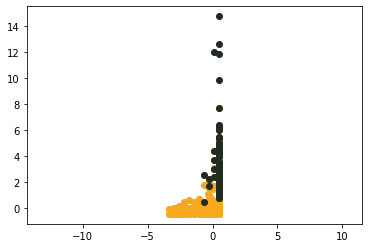

In [ ]:
import math
import time
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd


class Point(object):
	def __init__(self, location):
		self.visited = False
		self.noise = False
		self.incluster = False
		self.location = location


def import_data(file):
  df=pd.read_csv(file);
  df.drop(df.columns[[0]], axis = 1, inplace = True)
  from sklearn.preprocessing import StandardScaler
  trans = StandardScaler()
  df = trans.fit_transform(df)
  
  li=df.tolist()
  li=li[:1000]
  data=[]
  for k in li:
    data.append(Point(k))
  return data

# def import_data(file):
#   df=pd.read_csv(file);
#   li=df.values.tolist()
#   li=li[:1000]
#   data=[]
#   for k in li:
#     data.append(Point(k[1:]))
#   return data
    
# def import_data(file):
#   data=[]
#   f = open(str(file), 'r')
#   i=0
#   for line in f:
#     if i==0:
#       i==1
#       continue

#     current = line.split(",")
#     for j in range(1,len(current)):
#       current[j] = int(current[j])
#     data.append(Point(current))
#   print(data)
#   return data
  


# def import_data(file):
# 	data = []
# 	f = open(str(file), 'r')
# 	for line in f:
# 		current = line.split(",")
#     current = line.split(",")
  
    

#enter your own delimiter like ","
	# 	for j in range(1,len(current)):
	# 		current[j] = int(current[j])
	# 	data.append(Point(current))
    
    
	# data=data[:1000]
	# return data

def print_data_matrix(data):
	for i in data:
		print(i.location)

def distance(point1, point2):
	list1 = point1.location
	list2 = point2.location
	distance = 0
	for i in range(1,len(list1)):
		distance += abs(list1[i] - list2[i]) ** 2
	return math.sqrt(distance)

def calaculate_distance_matrix(data):
	distance_matrix =[]
	for i in range(0,len(data)):
		current = []
		for j in range(0,len(data)):
			current.append(distance(data[i], data[j]))
		distance_matrix.append(current)
	return distance_matrix

def regional_query(P, data , distance_matrix , epsilon):
	neighbour = []
	for i in range(0,len(data)):
		if data[i] == P:
			for j in range(0,len(data)):
				if distance_matrix[i][j] < epsilon:
					neighbour.append(data[j])
			break
	return neighbour

def expand_cluster(P, neighbor_pts, Cluster, epsilon, MinPts, data, distance_matrix):
	Cluster.append(P)
	P.incluster = True
	for P_neigh in neighbor_pts:
		if P_neigh.visited != True:
			P_neigh.visited = True
			neighbor_pts_in = regional_query(P_neigh, data , distance_matrix , epsilon)
			if len(neighbor_pts_in) >= MinPts:
				neighbor_pts = neighbor_pts_in + neighbor_pts
		if P_neigh.incluster != True:
			Cluster.append(P_neigh)


def dbscan(data, epsilon, MinPts):
	C = []
	distance_matrix = calaculate_distance_matrix(data)
	for P in data:
		#print P.location

		if P.visited == True:	
			continue
		P.visited = True
		neighbor_pts = regional_query(P, data, distance_matrix, epsilon)
		#print neighbor_pts
		if len(neighbor_pts) < MinPts:
			P.noise = True
		else:
			C.append([])
			expand_cluster(P, neighbor_pts, C[-1], epsilon, MinPts, data, distance_matrix)
	return C

def color(cluster_number):
	colors = []
	for i in range(0,cluster_number):
		colors.append("#%06x" % random.randint(0,0xFFFFFF))
	return colors

def graphic(final):
	colors = color(len(final))
	plt.ion()
	plt.figure()
	i = 0
	for cluster in final:
		dum = []
		for point in cluster:
			dum.append(point.location)

		x_ = [x[1] for x in dum]
    
		y_ = [y[2] for y in dum]
		#print(colors[i])
		plt.plot(x_, y_ , colors[i] , marker='o', ls='')
		i += 1
	plt.gca().set_aspect('equal', adjustable='box')
	plt.axis('equal')
	plt.show(block=False)
	plt.pause(10)
	plt.close()


def print_cluster(final):
	for i in range(0,len(final)):
		print("cluster ", i+1)
		print_data_matrix(final[i])



if __name__ == '__main__':
	data = import_data('/content/drive/My Drive/Colab Notebooks/CC GENERAL.csv')
	epsilon = 20
	min_pts = 30
	start = time.time()
	final = dbscan(data, epsilon, min_pts)
	print_cluster(final)
	print(time.time() - start, "seconds elapsed")
	graphic(final)